In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch
import torchvision
import seaborn as sb

root = os.path.dirname(os.getcwd())

# Metadata

In [2]:
meta = np.load('%s/data/PPD/param_arr.npy' % (root))
meta = pd.DataFrame(meta, columns=['m_dust', 'Rc', 'f_exp', 'H0', 
                                   'Rin', 'sd_exp', 'a_max', 'inc'])
meta.head()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,a_max,inc
0,1.000000e-07,100.0,1.15,5.0,0.1,0.0,10.0,90.0
1,1.000000e-07,100.0,1.15,5.0,0.1,-0.5,10.0,90.0
2,1.000000e-07,100.0,1.15,5.0,0.1,-1.0,10.0,90.0
3,1.000000e-07,100.0,1.15,5.0,1.0,-0.5,10.0,90.0
4,1.000000e-07,100.0,1.15,5.0,1.0,-1.0,10.0,90.0


In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36518 entries, 0 to 36517
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_dust  36518 non-null  float64
 1   Rc      36518 non-null  float64
 2   f_exp   36518 non-null  float64
 3   H0      36518 non-null  float64
 4   Rin     36518 non-null  float64
 5   sd_exp  36518 non-null  float64
 6   a_max   36518 non-null  float64
 7   inc     36518 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


In [4]:
meta.describe()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,a_max,inc
count,3.651800e+04,36518.000000,36518.000000,36518.000000,36518.000000,36518.000000,36518.000000,36518.000000
mean,4.687795e-04,141.561148,1.077674,14.604168,3.673851,-0.733200,1875.546854,82.290184
std,4.662241e-04,112.383466,0.165470,5.157389,4.458092,0.554319,3599.579642,7.053243
min,1.000000e-07,10.000000,0.850000,5.000000,0.100000,-1.500000,10.000000,52.692572
25%,1.000000e-04,30.000000,1.000000,10.000000,0.100000,-1.000000,10.000000,78.344277
50%,1.000000e-04,100.000000,1.150000,15.000000,1.000000,-0.500000,100.000000,84.202364
75%,1.000000e-03,300.000000,1.150000,20.000000,10.000000,0.000000,1000.000000,87.104894
max,1.000000e-03,300.000000,1.300000,20.000000,10.000000,0.000000,10000.000000,90.000000


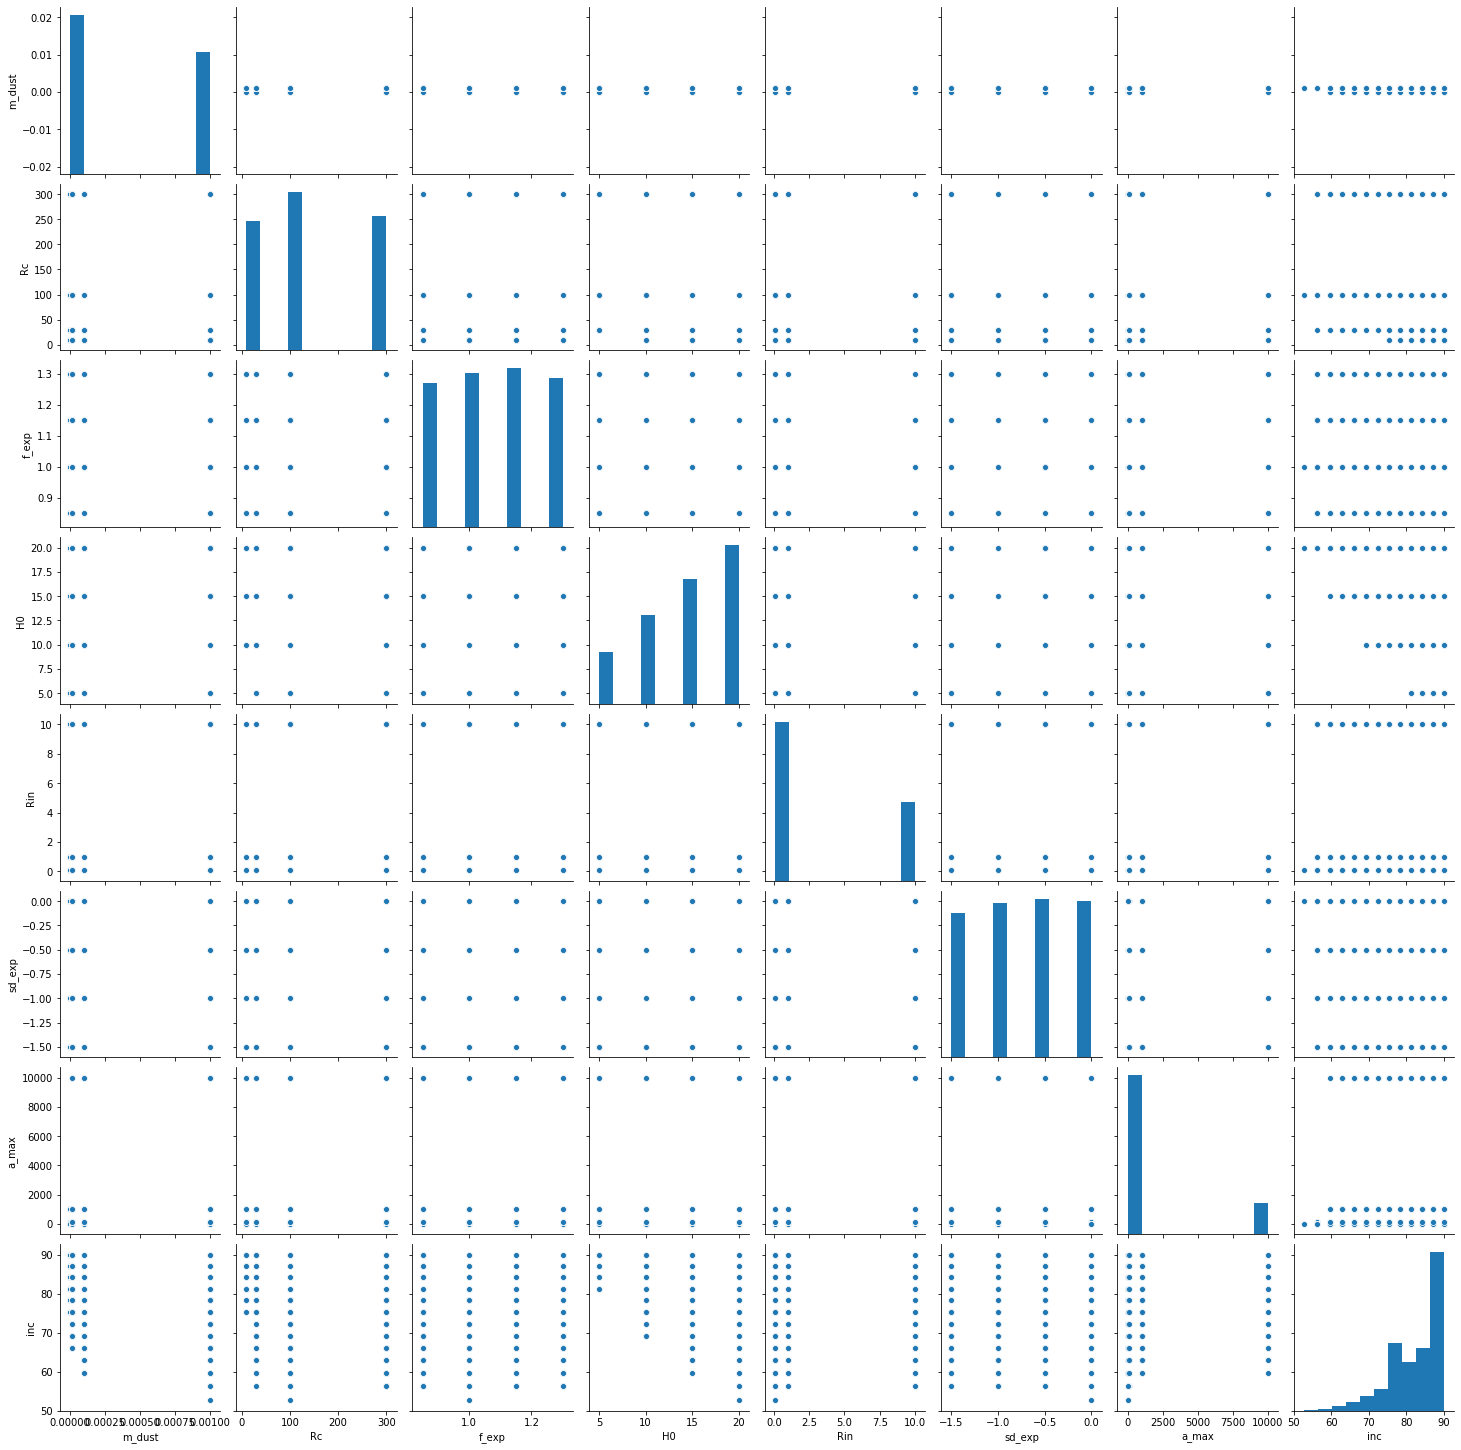

In [5]:
sb.pairplot(meta)
plt.show()

# Synthetic Images

In [6]:
imgs = np.load('%s/data/PPD/img_array.npy' % (root))
imgs = np.expand_dims(imgs, axis=1)
imgs.shape

(36518, 1, 187, 187)

In [7]:
print('Min ', imgs[0].min(), 'Max ', imgs[0].max())
print('Mean ', imgs.mean(), 'Std ', imgs.std())

Min  0.0 Max  5.9015464e-16
Mean  5.432005e-20 Std  1.876213e-18


In [8]:
def plot_wall(x):
    """Light-curves wall plot, function used during VAE training phase.
    Figure designed and ready to be appended to W&B logger.

    Parameters
    ----------
    xhat : numpy array
        Array of generated light curves
    x    : numpy array
        List of real light curves.
    epoch: int, optional
        Epoch number

    Returns
    -------
    fig
        a matplotlib figure
    image
        an image version of the figure
    """

    plt.close('all')
    ncols = 10
    fig, axis = plt.subplots(nrows=ncols, ncols=ncols, figsize=(ncols, ncols))
    for i, ax in enumerate(axis.ravel()):
        ax.imshow(x[i, 0, :, :], interpolation='bilinear',
                  cmap=cm.gray, origin='upper', aspect='equal')

    for ax in axis.ravel():
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)#, left=0, right=1)
    #plt.tight_layout()
    #fig.suptitle('Synthetic Images', fontsize=20, y=.95)
    plt.show()
    return

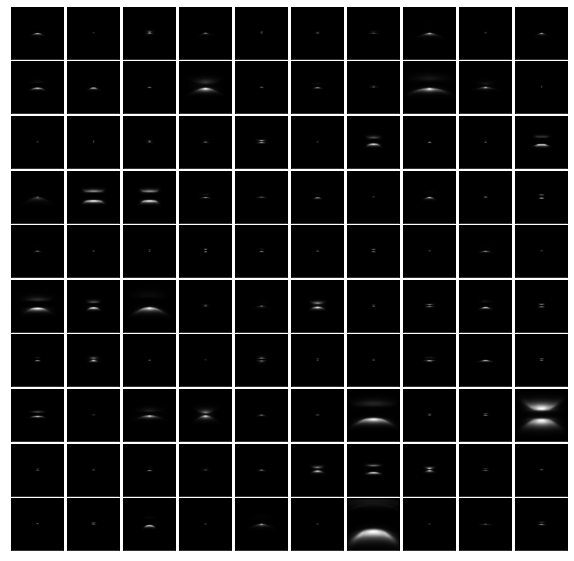

In [9]:
idx = np.random.randint(0, imgs.shape[0], size=100)
plot_wall(imgs[idx])

# Test dataset class

In [86]:
import sys
sys.path.append('../')
from src.dataset import ProtoPlanetaryDisks

In [102]:
ppd = ProtoPlanetaryDisks(transform=False)

In [103]:
ppd[idx][0].shape

(100, 1, 187, 187)

In [104]:
ppd.imgs.shape

(36518, 1, 187, 187)

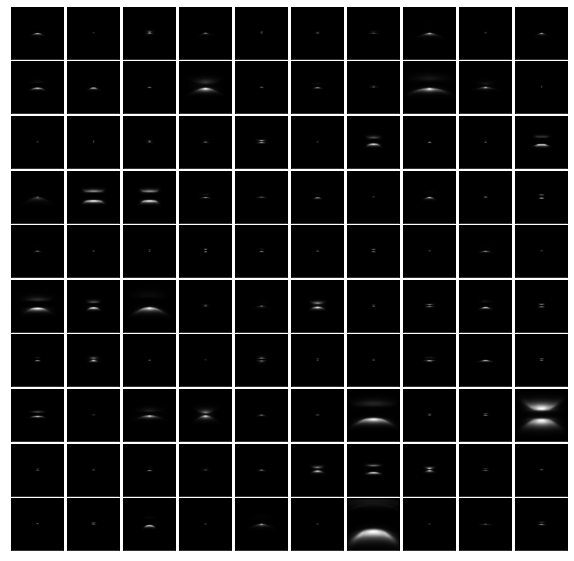

In [105]:
plot_wall(ppd[idx][0])

In [81]:
ppd.transform = True
train_loader, _ = ppd.get_dataloader(batch_size=100, test_split=0)

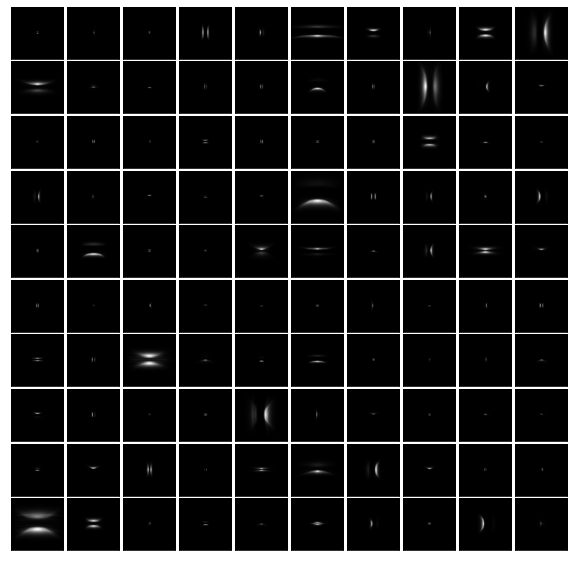

In [84]:
for img, meta in train_loader:
    plot_wall(img)
    break